In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [81]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/'

In [108]:
data2024 = ert.load(dir + 'mehriban/JuliusKunz/Kamik_WS_200V_125cm.Dat')
data2023 = ert.load(dir + 'mehriban/10_Aug_KamikF38/res2dinv_inputs/WS_rec_ele_nogps_noerror.Dat')
data2024_long = ert.load(dir + 'mehriban/JuliusKunz/Kamik_WS_200V_250cm.Dat')

01/08/24 - 11:08:28 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
01/08/24 - 11:08:28 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
01/08/24 - 11:08:29 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c460e29a10>)

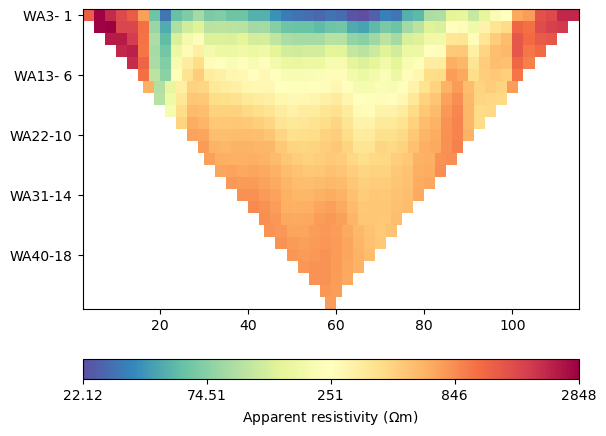

In [109]:
ert.showData(data2024_long)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c453e20890>)

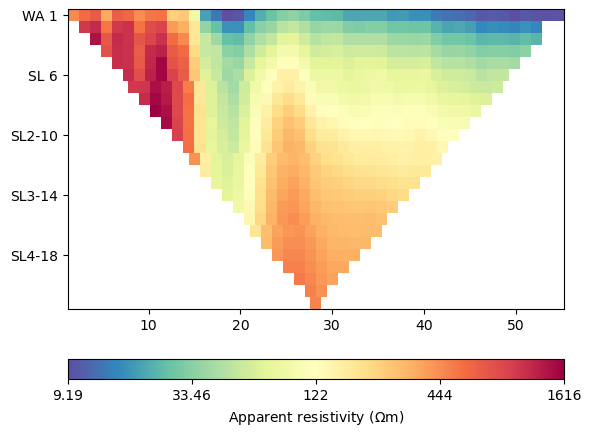

In [84]:
ert.showData(data2023)

01/08/24 - 09:35:25 - pyGIMLi - INFO - Cache C:\Users\Expedition\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (4.3s x 1): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\13498538405943447826
01/08/24 - 09:35:25 - pyGIMLi - INFO - Cache C:\Users\Expedition\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\11372240476415246841


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c4541bcd90>)

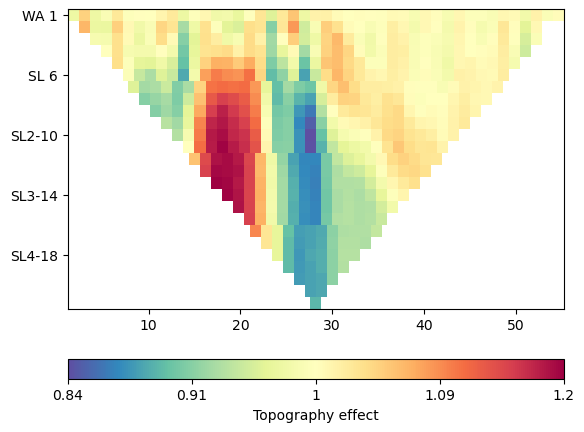

In [85]:
data2023.setSensorPositions(pg.meshtools.interpolateAlongCurve(data2023.additionalPoints(), pg.x(data2023)))
data2023['k'] = ert.createGeometricFactors(data2023, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data2023)
ert.showData(data2023, vals=k0/data2023['k'], label='Topography effect')


01/08/24 - 09:35:28 - pyGIMLi - INFO - Cache C:\Users\Expedition\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (4.2s x 1): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\13299738636546184795
01/08/24 - 09:35:28 - pyGIMLi - INFO - Cache C:\Users\Expedition\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Users\Expedition\AppData\Roaming\pygimli\Cache\10980862150062535371


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c454685dd0>)

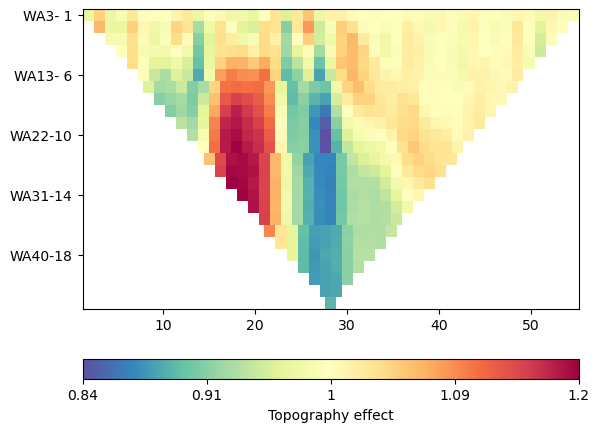

In [86]:
data2024.setSensorPositions(pg.meshtools.interpolateAlongCurve(data2023.additionalPoints(), pg.x(data2024)))
data2024['k'] = ert.createGeometricFactors(data2024, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data2024)
ert.showData(data2024, vals=k0/data2024['k'], label='Topography effect')

01/08/24 - 11:09:43 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
01/08/24 - 11:09:46 - pyGIMLi - INFO - Save RVector binary
01/08/24 - 11:09:46 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\12538760258852579973
01/08/24 - 11:09:46 - pyGIMLi - INFO - Save RVector binary
01/08/24 - 11:09:46 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\13094421247820460644


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c461b02d10>)

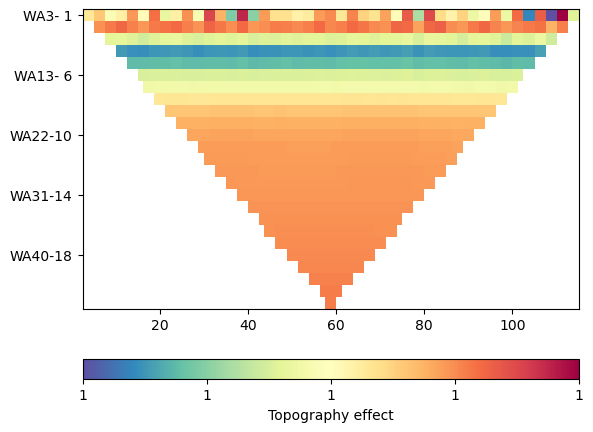

In [110]:
data2024_long.setSensorPositions(pg.meshtools.interpolateAlongCurve(data2024_long.additionalPoints(), pg.x(data2024_long)))
data2024_long['k'] = ert.createGeometricFactors(data2024_long, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data2024_long)
ert.showData(data2024_long, vals=k0/data2024_long['k'], label='Topography effect')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c454878890>)

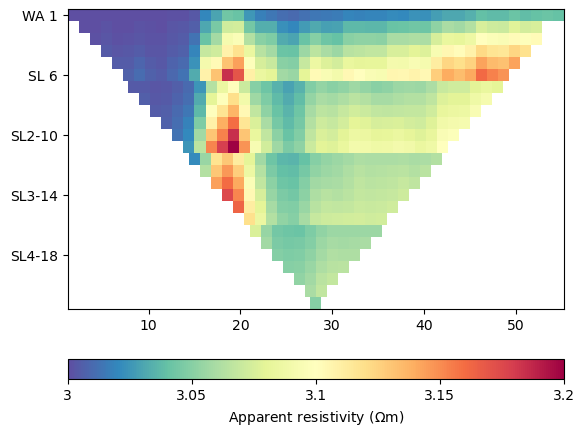

In [87]:
data2023['err'] = ert.estimateError(data2023, relativeError=0.03, absoluteUError=5e-5)
ert.show(data2023, data2023['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c454c5d690>)

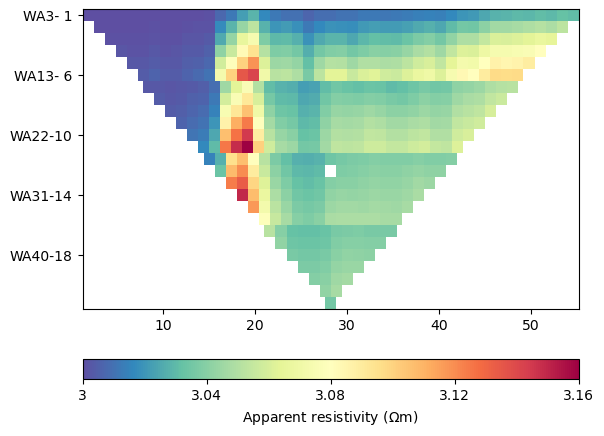

In [88]:
data2024['err'] = ert.estimateError(data2024, relativeError=0.03, absoluteUError=5e-5)

data2024.remove(data2024["err"] > 0.07)
#ert.show(data2024, data2024['err'])
ert.show(data2024, data2024['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c461d28890>)

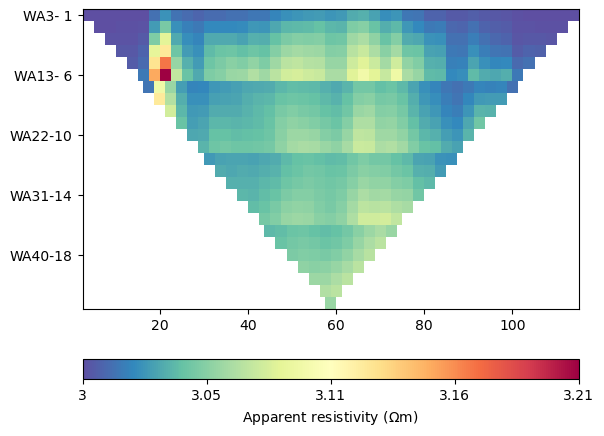

In [111]:
data2024_long['err'] = ert.estimateError(data2024_long, relativeError=0.03, absoluteUError=5e-5)

#data2024_long.remove(data2024_long["err"] > 0.07)
#ert.show(data2024, data2024['err'])
ert.show(data2024_long, data2024_long['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c455e80890>)

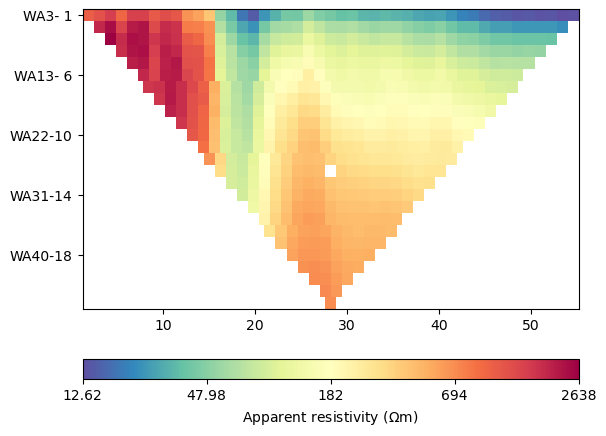

In [89]:
ert.showData(data2024)

01/08/24 - 09:35:41 - pyGIMLi - INFO - Found 2 regions.
01/08/24 - 09:35:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/08/24 - 09:35:41 - pyGIMLi - INFO - Found 2 regions.
01/08/24 - 09:35:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/08/24 - 09:35:41 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/08/24 - 09:35:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/08/24 - 09:35:42 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2342 Cells: 4340 Boundaries: 3426
01/08/24 - 09:35:42 - pyGIMLi - INFO - Use median(data values)=124.4685
01/08/24 - 09:35:42 - pyGIMLi - INFO - Created startmodel from forward operator: 910, min/max=124.468500/124.468500
01/08/24 - 09:35:42 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C44E1F2BB0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001C453EE84A0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C45450FD80>
min/max (data): 9.19/1616
min/max (error): 3%/3.2%
min/max (start model): 124/124
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1399.53
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  131.58 (dPhi = 90.25%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   78.27 (dPhi = 39.80%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   39.91 (dPhi = 45.47%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.06 (dPhi = 80.52%) lam: 20.0
----------------

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x1c455f2ad10>)

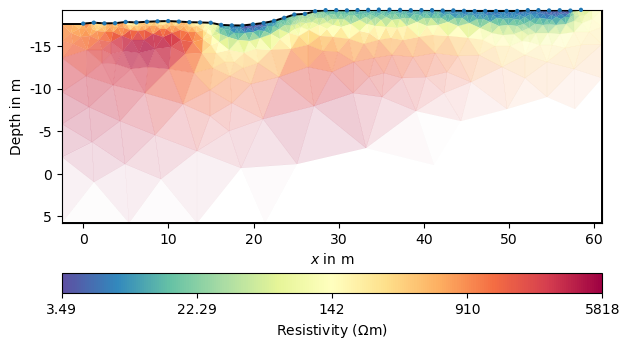

In [90]:
mgr.invert(data2023, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)


mgr.showResult()

01/08/24 - 09:36:38 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/pygimli/all_inversions/INV_Kamik2023_WS\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/pygimli/all_inversions/INV_Kamik2023_WS\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

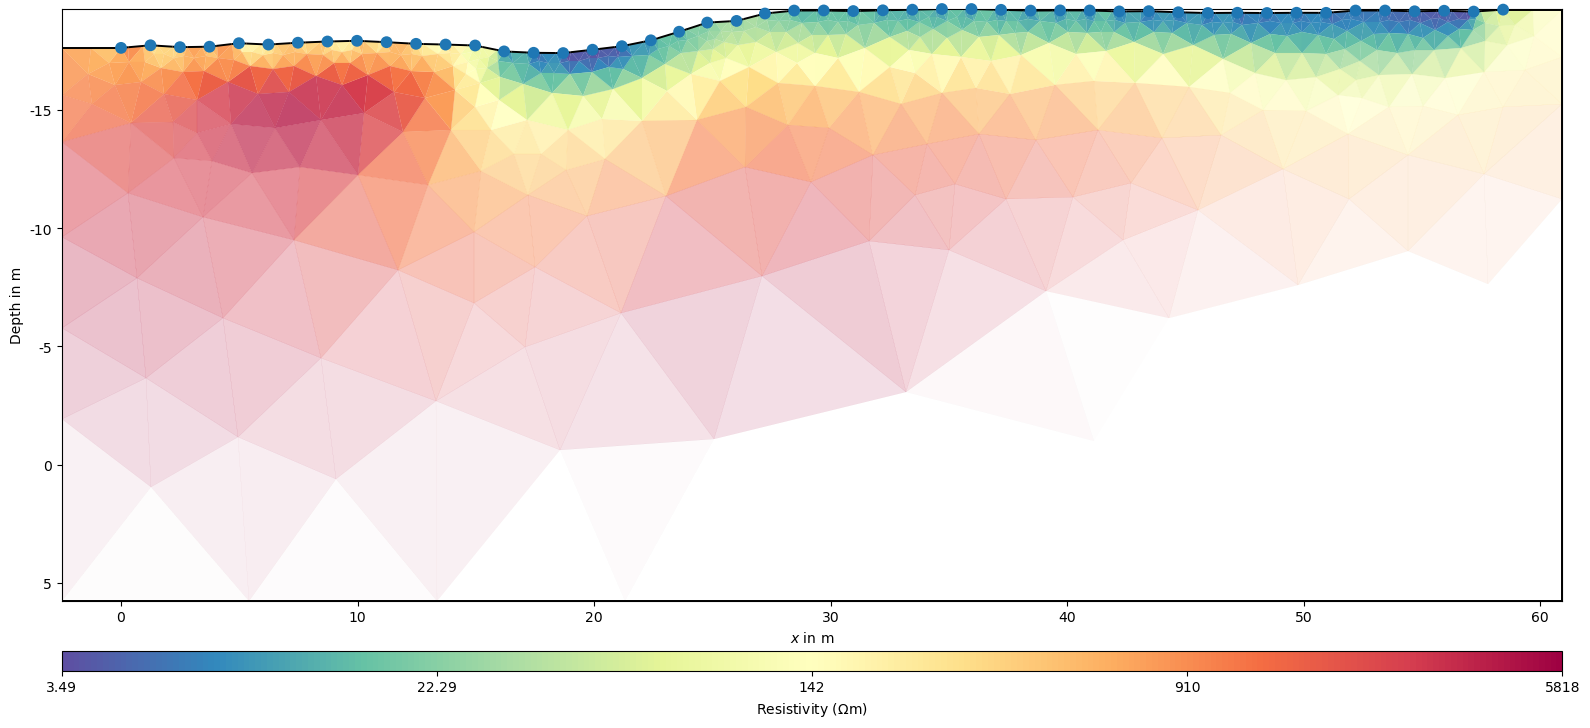

In [91]:
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_Kamik2023_WS')

01/08/24 - 09:36:57 - pyGIMLi - INFO - Use median(data values)=200.375
01/08/24 - 09:36:57 - pyGIMLi - INFO - Created startmodel from forward operator: 910, min/max=200.375000/200.375000
01/08/24 - 09:36:57 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C44E1F2BB0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001C453EE84A0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C45450FD80>
min/max (data): 12.62/2638
min/max (error): 3%/3.16%
min/max (start model): 200/200
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1485.70
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  132.70 (dPhi = 90.73%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   72.17 (dPhi = 44.72%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   16.23 (dPhi = 71.68%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.63 (dPhi = 61.44%) lam: 20.0
--------------

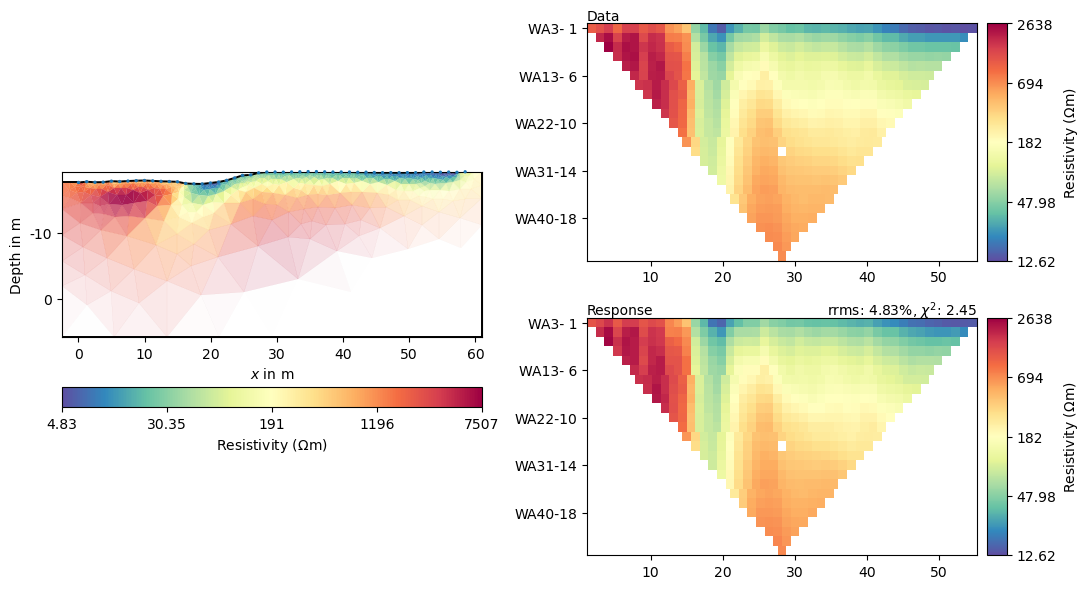

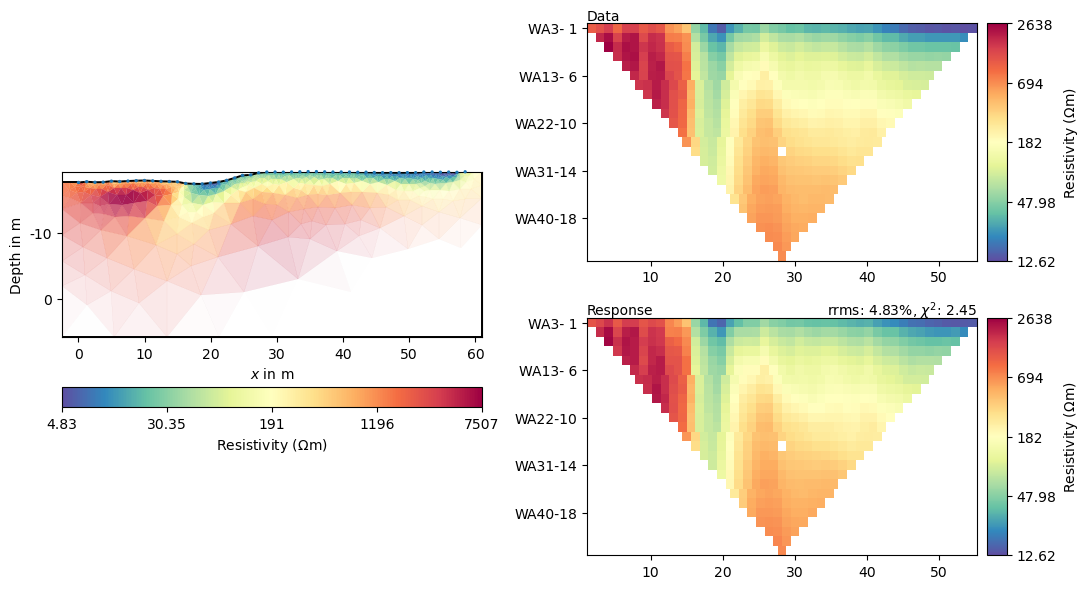

In [92]:
mgr.invert(data2024, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)


mgr.showResultAndFit()

01/08/24 - 09:37:58 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/pygimli/all_inversions/INV_Kamik2024_WS\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/pygimli/all_inversions/INV_Kamik2024_WS\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

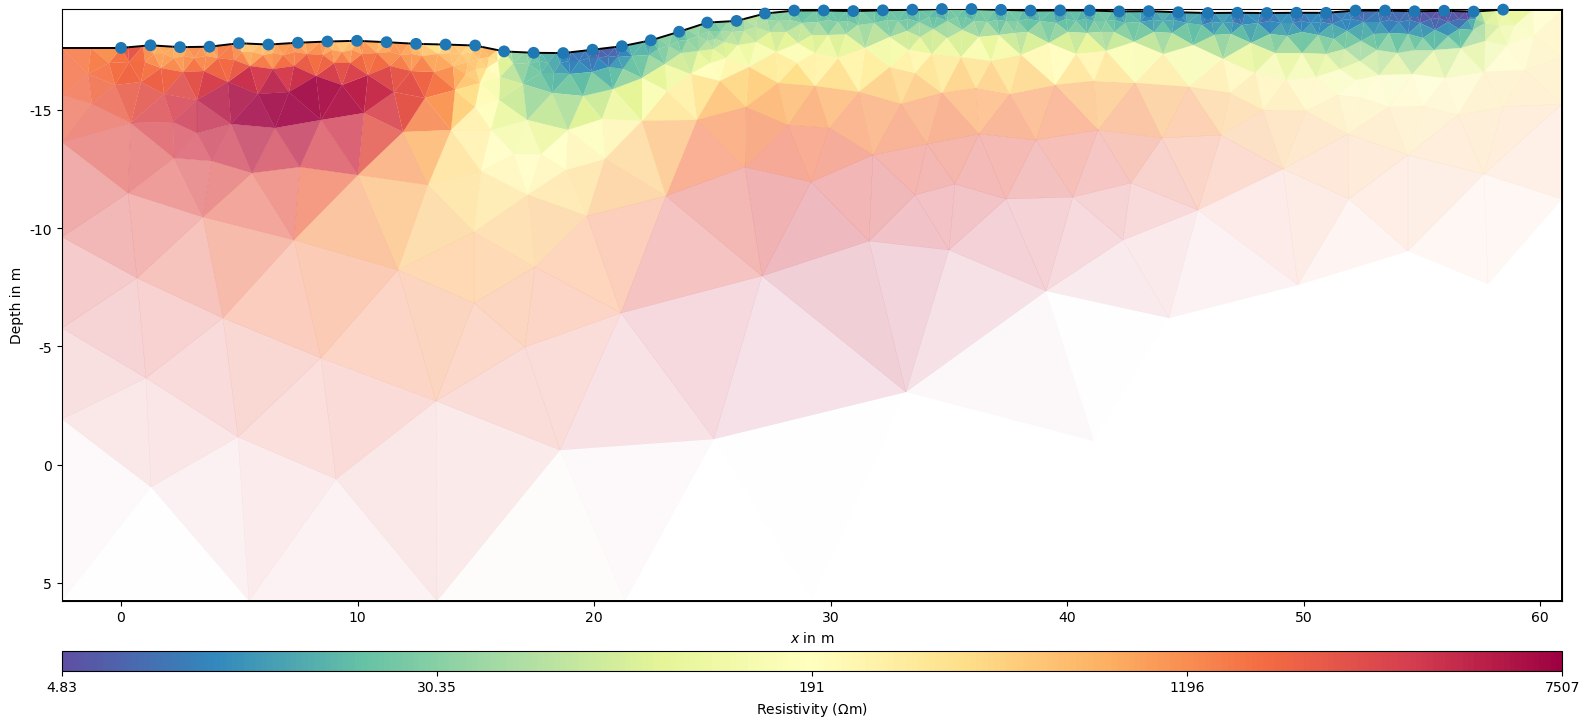

In [93]:
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_Kamik2024_WS')

01/08/24 - 11:11:16 - pyGIMLi - INFO - Found 2 regions.
01/08/24 - 11:11:16 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/08/24 - 11:11:16 - pyGIMLi - INFO - Found 2 regions.
01/08/24 - 11:11:16 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/08/24 - 11:11:16 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/08/24 - 11:11:16 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/08/24 - 11:11:16 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2521 Cells: 4696 Boundaries: 3694
01/08/24 - 11:11:16 - pyGIMLi - INFO - Use median(data values)=448.56
01/08/24 - 11:11:16 - pyGIMLi - INFO - Created startmodel from forward operator: 951, min/max=448.560000/448.560000
01/08/24 - 11:11:16 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C460DCCD10>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001C4607BC810>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C45F98D2B0>
min/max (data): 22.12/2848
min/max (error): 3%/3.21%
min/max (start model): 449/449
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  900.17
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  105.64 (dPhi = 87.97%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   69.34 (dPhi = 33.29%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   42.76 (dPhi = 35.78%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   25.02 (dPhi = 30.94%) lam: 20.0
--------------

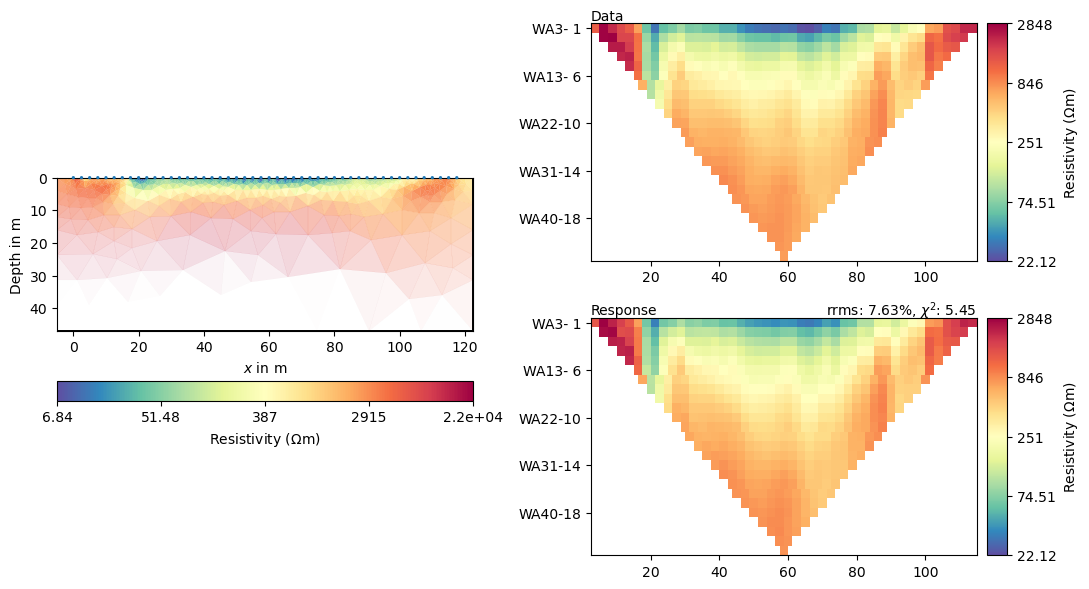

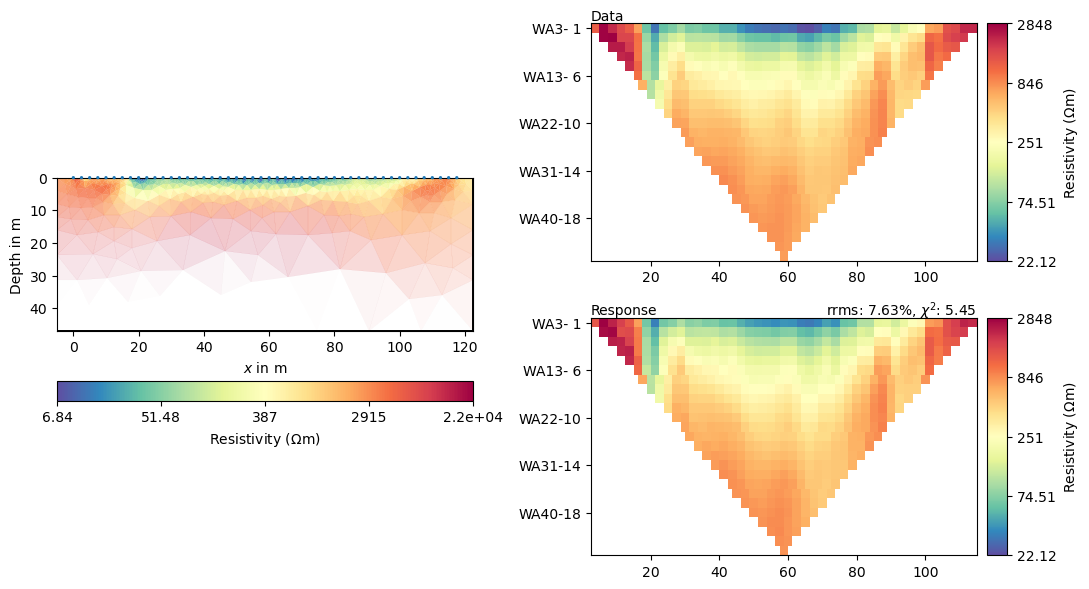

In [112]:
mgr.invert(data2024_long, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)


mgr.showResultAndFit()

01/08/24 - 11:12:18 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/pygimli/all_inversions/INV_Kamik2024_WS_long\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/pygimli/all_inversions/INV_Kamik2024_WS_long\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

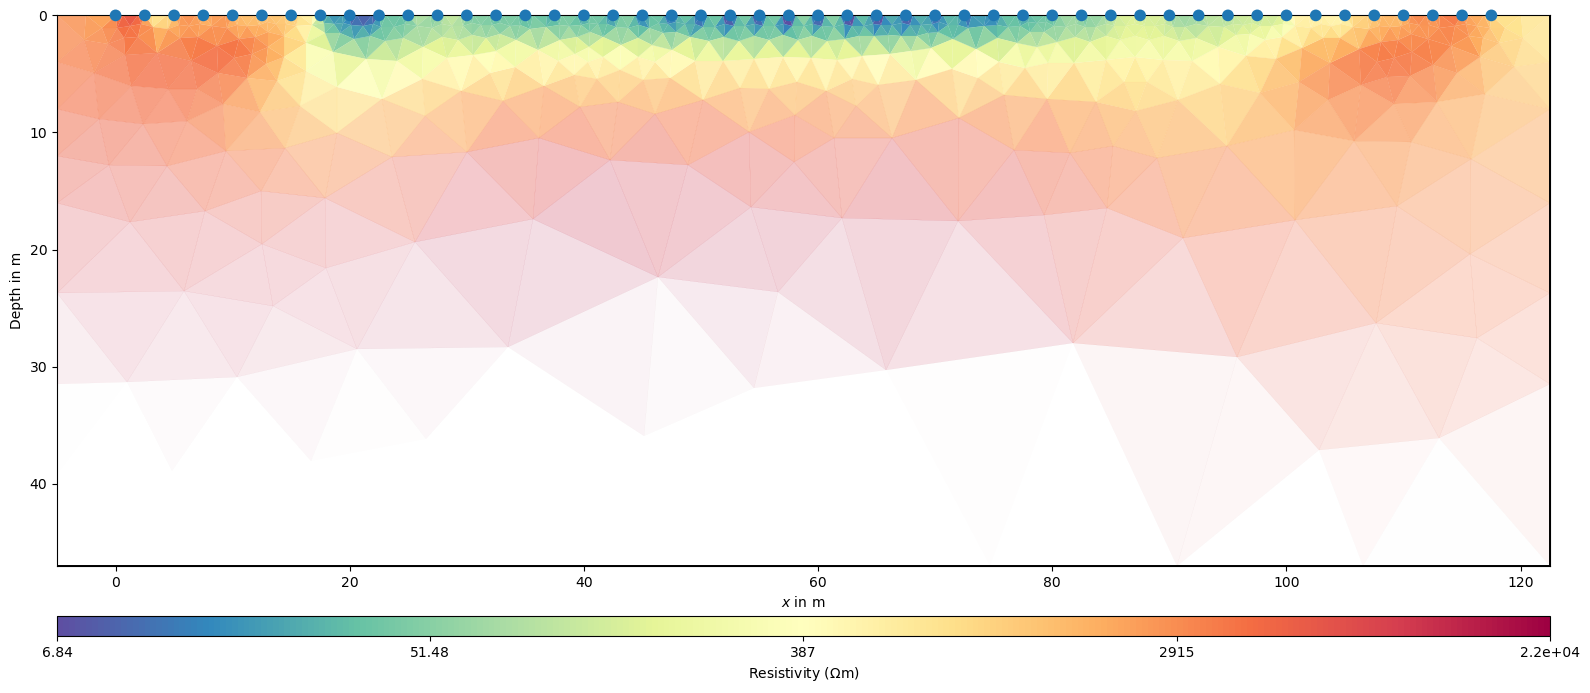

In [113]:
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_Kamik2024_WS_long')

In [94]:
mesh_kamik2023_ws = pg.load(dir+'pygimli/all_inversions/INV_Kamik2023_WS/ERTManager/resistivity-pd.bms')
res_kamik2023_ws = pg.load(dir+'pygimli/all_inversions/INV_Kamik2023_WS/ERTManager/resistivity.vector')
cov_kamik2023_ws = pg.load(dir+'pygimli/all_inversions/INV_Kamik2023_WS/ERTManager/resistivity-cov.vector')

mesh_kamik2024_ws = pg.load(dir+'pygimli/all_inversions/INV_Kamik2024_WS/ERTManager/resistivity-pd.bms')
res_kamik2024_ws = pg.load(dir+'pygimli/all_inversions/INV_Kamik2024_WS/ERTManager/resistivity.vector')
cov_kamik2024_ws = pg.load(dir+'pygimli/all_inversions/INV_Kamik2024_WS/ERTManager/resistivity-cov.vector')

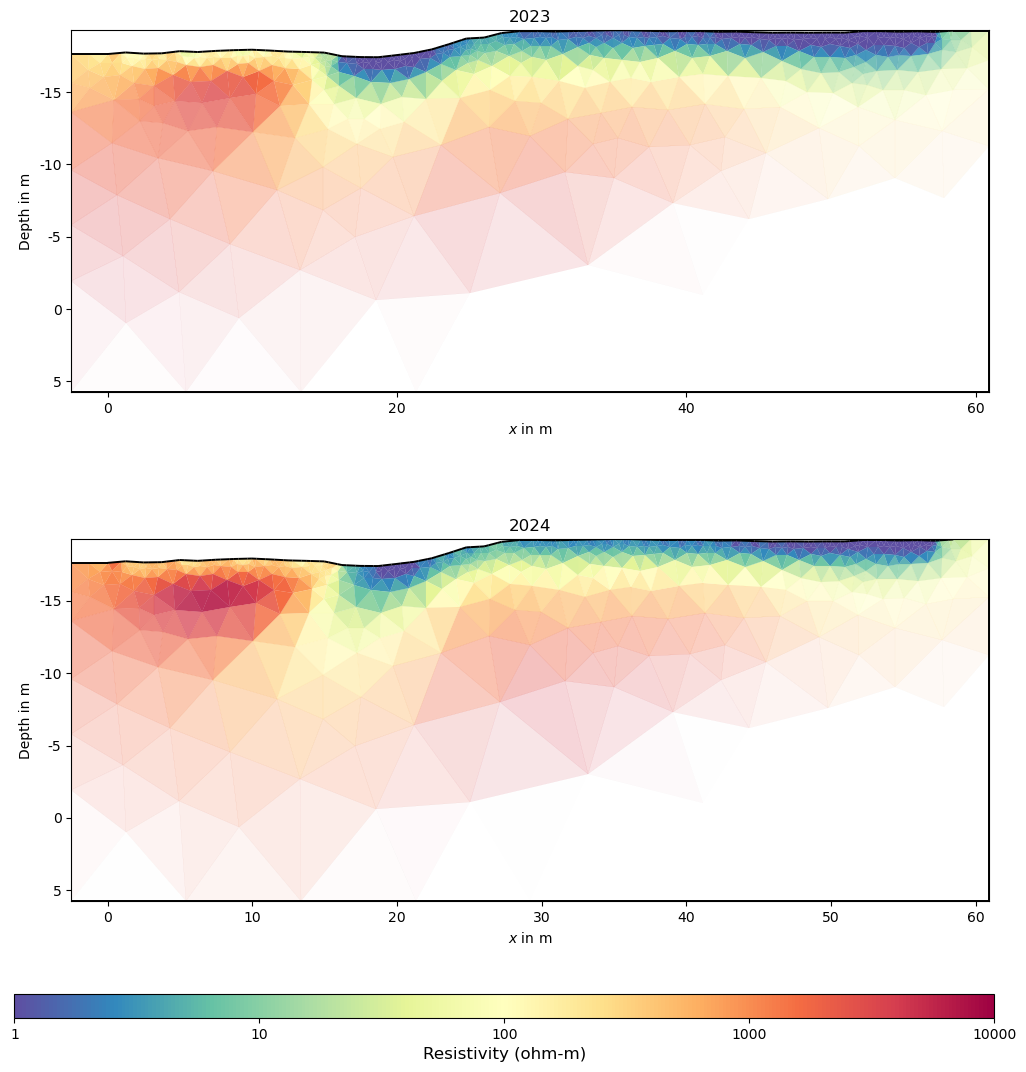

In [107]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pygimli as pg  # assuming pg is an alias for PyGIMLi
from matplotlib.ticker import MultipleLocator

# Define common normalization and colormap for linear scale
cmin = 10
cmax = 10000
cmap = "Spectral_r"



# Create a 1x2 grid of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot on the subplots with the common normalization and colormap
pg.show(mesh_kamik2023_ws, res_kamik2023_ws, cMap=cmap, ax=ax[0], colorBar=False, cMin=cmin, cMax=cmax,logScale=True, sharey = True, coverage=cov_kamik2023_ws)
pg.show(mesh_kamik2024_ws, res_kamik2024_ws, cMap=cmap, ax=ax[1], colorBar=False, cMin=cmin, cMax=cmax, logScale=True, sharey = True, coverage=cov_kamik2024_ws)



cax1 = fig.add_axes([0.01, 0.04, 0.98, 0.02])  
colorbar1 = pg.viewer.mpl.createColorBarOnly(ax=cax1, cMin=1, cMax=10000, logScale=True, cMap="Spectral_r")


ax[0].set_title('2023')
ax[1].set_title('2024')

#ax[0].set_ylim(-50, 15)
#ax[1].set_ylim(-50, 15)



#ax[0].set_aspect(1.06)

ax[0].xaxis.set_major_locator(MultipleLocator(20))
ax[0].xaxis.set_major_locator(MultipleLocator(20))


cax1.set_xlabel('Resistivity (ohm-m)', fontsize=12)

plt.show()
